In [72]:
import pandas as pd


In [73]:
import numpy as np

In [74]:
df = pd.read_csv("train.csv")

In [75]:
# Shape of data set
df.shape

(891, 12)

In [76]:
# All columns of data set
df.columns


Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [77]:
# Describing dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
# Describe dataset
df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [79]:
# Shows top 5 rows of the data set
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
# Shows bottom 5 rows of the data set.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [81]:
# To check if there is any missing data.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df = df.drop(['Cabin'],axis = 1)

In [83]:
# Cabin is dropped thus age and embarked have missing values.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [84]:
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked'],
      dtype='object')

In [85]:
# Missing values in Age are filled using mean
from sklearn.preprocessing import Imputer
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [87]:
#Missing values in Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [88]:
df['Embarked'] = df['Embarked'].fillna('S')

In [89]:
survived = df[df['Survived'] == 1]
survived


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,C


In [90]:
# Missing values in age are filled using mean thus only embarked left with missing values.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [91]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
#Check missing data again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [93]:
df[df['Survived'] == 1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,C


In [94]:
not_survived = df[df['Survived'] == 1]
not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.000000,0,0,248706,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,C


In [95]:
print 'Survived ', survived.head(), '\n\nNot Survived ', not_survived.head()


Survived     PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Embarked  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
8      2            347742  11.1333        S  
9      0            237736  30.0708        C   

Not Survived     Passenger

In [96]:
print "Survived: %i (%f%%)" % (len(survived), float(len(survived))/len(df)*100.0)
print "Not Survived: %i (%f%%)" % (len(not_survived), float(len(not_survived))/len(df)*100.0)
print "Total : %i" % len(df)

Survived: 342 (38.383838%)
Not Survived: 342 (38.383838%)
Total : 891


In [97]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [98]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [99]:
#Value Counts of Sex
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [100]:
#Survival grouped by Sex
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [101]:
df.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
30.000000     25
19.000000     25
21.000000     24
25.000000     23
36.000000     22
29.000000     20
35.000000     18
26.000000     18
32.000000     18
27.000000     18
31.000000     17
16.000000     17
23.000000     15
34.000000     15
33.000000     15
20.000000     15
39.000000     14
40.000000     13
42.000000     13
17.000000     13
45.000000     12
38.000000     11
4.000000      10
50.000000     10
2.000000      10
            ... 
0.830000       2
30.500000      2
0.750000       2
57.000000      2
55.000000      2
70.000000      2
10.000000      2
32.500000      2
71.000000      2
63.000000      2
28.500000      2
45.500000      2
40.500000      2
59.000000      2
14.500000      1
0.670000       1
12.000000      1
0.920000       1
74.000000      1
34.500000      1
70.500000      1
36.500000      1
24.500000      1
66.000000      1
80.000000      1
55.500000      1
53.000000      1
20.500000     

In [102]:
df.groupby('Age').Survived.value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   1           5
       0           2
2.00   0           7
       1           3
3.00   1           5
       0           1
4.00   1           7
       0           3
5.00   1           4
6.00   1           2
       0           1
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           2
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           3
14.50  0           1
                  ..
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
55.50  0           1
56.00  0           2
       1           2
57.00  0           2
58.00  1           3
       0           2
59.00  0          

In [103]:
df.Fare.value_counts()


8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [104]:
df.groupby('Fare').Survived.value_counts()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
6.4375    0            1
6.4500    0            1
6.4958    0            2
6.7500    0            2
6.8583    0            1
6.9500    0            1
6.9750    0            1
          1            1
7.0458    0            1
7.0500    0            7
7.0542    0            2
7.1250    0            4
7.1417    1            1
7.2250    0            9
          1            3
7.2292    0           11
          1            4
7.2500    0           12
          1            1
7.3125    0            1
7.4958    0            2
          1            1
7.5208    0            1
7.5500    0            3
          1            1
                      ..
106.4250  0            1
          1            1
108.9000  0            1
          1            1
110.8833  1            3
          0            1
113.2750  1            2
          0            1
120.00

In [105]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [106]:
df.groupby('Embarked').Survived.value_counts()


Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
import seaborn as sns
sns.set()

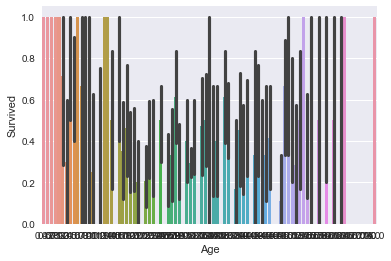

In [109]:
sns.barplot(x='Age', y='Survived', data=df)
sns.despine()

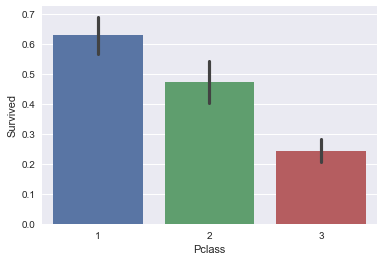

In [110]:
sns.barplot(x='Pclass', y='Survived', data=df)
sns.despine()

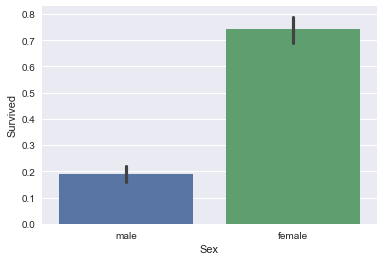

In [111]:
sns.barplot(x='Sex', y='Survived', data=df)
sns.despine()

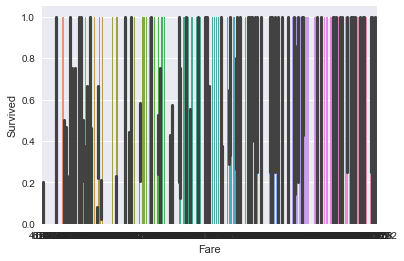

In [112]:
sns.barplot(x='Fare', y='Survived', data=df)
sns.despine()

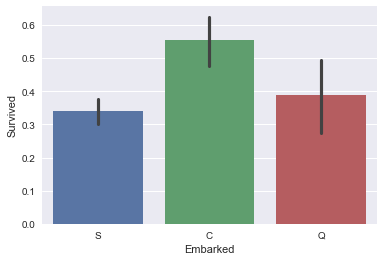

In [113]:
sns.barplot(x='Embarked', y='Survived', data=df)
sns.despine()

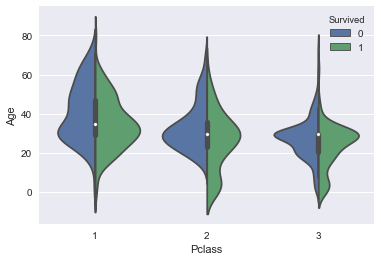

In [114]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
sns.despine()

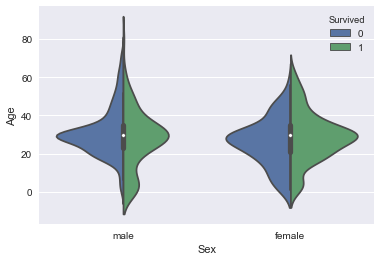

In [115]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)
sns.despine()

In [116]:
#Encoding Sex
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])
print df.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S  


In [117]:
#Encoding Embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
df.iloc[:, [10]] = labelencoder_embarked.fit_transform(df.iloc[:, [10]])
print df.head()

df.Embarked.value_counts()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


2    646
0    168
1     77
Name: Embarked, dtype: int64

In [118]:
#One Hot Encoding Pclass and Embarked
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0,0,1


In [119]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print df.head()

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare  Pclass_1  Pclass_2  \
0    1  22.0      1      0         A/5 21171   7.2500         0         0   
1    0  38.0      1      0          PC 17599  71.2833         1         0   
2    0  26.0      0      0  STON/O2. 3101282   7.9250         0         0   
3    0  35.0      1      0            113803  53.1000         1         0   
4    1  35.0      0      0            373450   8.0500         0         0   

   Pclass_3  Embarked_0  Embarked_1  Embarked_2  FamilySize  


In [120]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0,0,1,1


In [121]:
df.to_csv('titanic_prepared_data.csv', index=False)
df = pd.read_csv('titanic_prepared_data.csv')
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0,0,1,1


In [122]:

X = df.iloc[:, 1:].values
y = df.iloc[:, 0:1].values
print X.shape, y.shape


(891L, 15L) (891L, 1L)


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print X_train.shape, y_train.shape

(623L, 15L) (623L, 1L)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train) #Trivia : What does ravel do?
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

ValueError: could not convert string to float: Brown, Mr. Thomas William Solomon

In [ ]:
print y_train.shape
print y_train.ravel().shape

In [ ]:
clf2 = LogisticRegression(C=0.08)
clf2.fit(X_train, y_train) #Trivia : What does ravel do?
y_pred_log_reg2 = clf2.predict(X_test)
acc_log_reg2 = round( accuracy_score(y_pred_log_reg2, y_test) * 100, 2)
print (str(acc_log_reg2) + ' %')

In [ ]:
df.describe()

In [ ]:
g = sns.countplot(x = 'Survived', data = df)
g.set_xlabel("1 = Survived, 0 = dead")
g.set_title("Survival Count Plot")
sns.despine()

In [ ]:
p = sns.countplot(x = 'Sex', data = df)
p.set_xlabel("1 = Survived, 0 = dead")
p.set_title("Survival Count Plot")
sns.despine()

In [ ]:
p = sns.countplot(x = 'Age' , data = df) 
p.set_title("Survival Count Plot")
sns.despine()

In [ ]:
s = sns.boxplot(y = 'Age' , data = df)
sns.despine()

In [ ]:
s = sns.boxplot(x = 'Age' , data = df)
sns.despine()

In [ ]:
df.Age.describe()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
sns.set(color_codes=True)
ax = sns.regplot(x=df["Fare"], y=df["Survived"], marker = '+' , fit_reg = False)

In [ ]:
df.isnull().sum()

In [ ]:
df.tail()